In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint

In [3]:
df = pd.read_csv('../data/ab_test_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [5]:
group_summary = df.groupby('group')['converted'].agg(['sum', 'count'])
successes = group_summary['sum'].values
n_obs = group_summary['count'].values

z_stat, p_val = proportions_ztest(successes, n_obs)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Obvious, A and B test has significant difference")
else:
    print("Not obvious, A and B test has no significant difference")

Z-statistic: -2.4050
P-value: 0.0162
Obvious, A and B test has significant difference


/tmp/ipykernel_3021/1994797927.py:14: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=ci_df, x='group', y='conversion_rate', join=False, capsize=0.2)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.

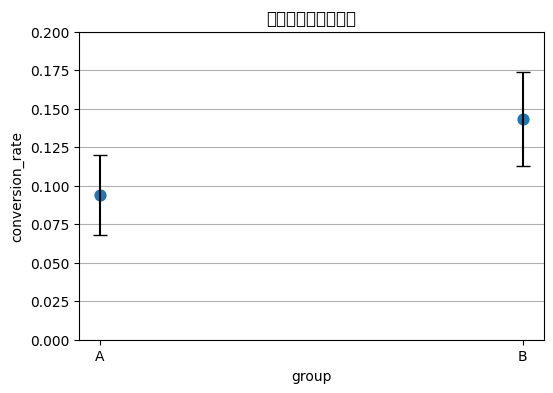

In [7]:
confint = [
    proportion_confint(count=successes[i], nobs=n_obs[i], alpha=0.05, method='normal')
    for i in range(2)
]

ci_df = pd.DataFrame({
    'group': ['A', 'B'],
    'conversion_rate': successes / n_obs,
    'lower_ci': [c[0] for c in confint],
    'upper_ci': [c[1] for c in confint]
})

plt.figure(figsize=(6, 4))
sns.pointplot(data=ci_df, x='group', y='conversion_rate', join=False, capsize=0.2)
plt.errorbar(x=[0, 1], y=ci_df['conversion_rate'], 
             yerr=[ci_df['conversion_rate'] - ci_df['lower_ci'], 
                   ci_df['upper_ci'] - ci_df['conversion_rate']], 
             fmt='none', c='black', capsize=5)
plt.title("转化率及其置信区间")
plt.ylim(0, 0.2)
plt.grid(axis='y')
plt.show()